# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [7]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4]
regularization_strengths = [0]
# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
count = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        count += 1
#         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
        print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths))))
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, lr, reg, num_iters=1500)
        y_pred_train = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_pred_train)
        y_pred_val = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_pred_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,reg)] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

[COMPLETION PERCENTAGE] 16.000000 
[COMPLETION PERCENTAGE] 33.000000 
[COMPLETION PERCENTAGE] 50.000000 
[COMPLETION PERCENTAGE] 66.000000 
[COMPLETION PERCENTAGE] 83.000000 
[COMPLETION PERCENTAGE] 100.000000 
lr 1.000000e-04 reg 0.000000e+00 train accuracy: 0.449224 val accuracy: 0.441000
lr 5.000000e-04 reg 0.000000e+00 train accuracy: 0.489939 val accuracy: 0.480000
lr 1.000000e-03 reg 0.000000e+00 train accuracy: 0.502449 val accuracy: 0.485000
lr 5.000000e-03 reg 0.000000e+00 train accuracy: 0.511673 val accuracy: 0.507000
lr 1.000000e-02 reg 0.000000e+00 train accuracy: 0.509449 val accuracy: 0.495000
lr 5.000000e-02 reg 0.000000e+00 train accuracy: 0.497857 val accuracy: 0.485000
best validation accuracy achieved during cross-validation: 0.507000


In [8]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.49


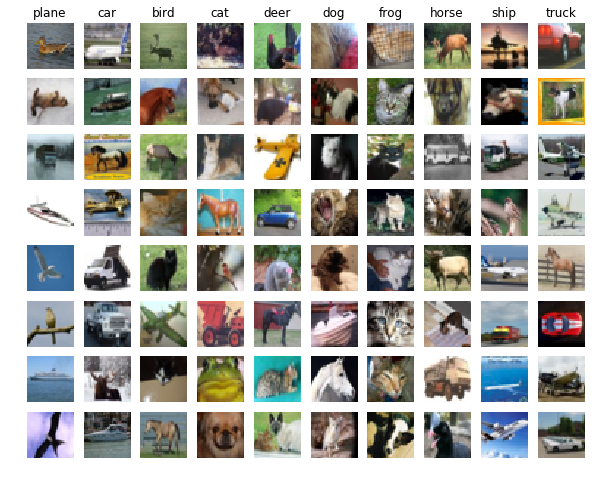

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
**Answer** The features we have used try to capture the colour components, and the texture captured through gradients. First of, it is easy to observe that misclassifications are happening between classes and not just randomly i.e. there are car images in truck and truck images in car, but no car images in frog and no frog images in a car. The reason being, in trying to learn the characteristics of a car, the features capture certain colour and shape profile which sometimes is not enough to differentiate a car from a truck. By looking at misclassified examples we can see a few:
Plane: a few images of birds because shape is very similar to a plane (wings etc.). The surrounding colour profile is also similar to what is expected for a plane (sky)
Car: a few truck images because similar structure of the vehicle and similar surrounding settings (roads etc.)


## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [10]:
print(X_train_feats.shape)

(49000, 155)


In [65]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val = -1
best_stats = None

learning_rates = [16e-2, 18e-2, 20e-2, 30e-2]
# learning_rates = [a*1e-4 for a in range(5,15,2)]
# learning_rates = [a*1e-6 for a in range(1,12,3)]
regularization_strengths = [0]
# regularization_strengths = [1e1, 1e2, 1e3, 5e1, 5e2, 5e3]
# regularization_strengths = [0, 0.3*1e1, 0.7*1e1, 1e1]
input_size = 32 * 32 * 3
hidden_sizes = [300]
num_classes = 10

count = 0
for hs in hidden_sizes:
    for lr in learning_rates:
        for reg in regularization_strengths:
            count += 1
    #         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
            net = TwoLayerNet(input_dim, hs, num_classes)
            # Train the network
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=3000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=False)

            y_pred_train = net.predict(X_train_feats)
            train_accuracy = np.mean(y_train == y_pred_train)
            y_pred_val = net.predict(X_val_feats)
            val_accuracy = np.mean(y_val == y_pred_val)

            if val_accuracy > best_val:
                best_val = val_accuracy
                best_net = net
                best_stats = stats
            results[(lr,reg,hs)] = train_accuracy, val_accuracy
            
            print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths)*len(hidden_sizes))))
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg, hs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hs)]
    print('lr %e reg %e hs %e \n train accuracy: %f val accuracy: %f' % (
                lr, reg, hs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

[COMPLETION PERCENTAGE] 25.000000 
[COMPLETION PERCENTAGE] 50.000000 
[COMPLETION PERCENTAGE] 75.000000 
[COMPLETION PERCENTAGE] 100.000000 
lr 1.600000e-01 reg 0.000000e+00 hs 3.000000e+02 
 train accuracy: 0.613469 val accuracy: 0.549000
lr 1.800000e-01 reg 0.000000e+00 hs 3.000000e+02 
 train accuracy: 0.628531 val accuracy: 0.562000
lr 2.000000e-01 reg 0.000000e+00 hs 3.000000e+02 
 train accuracy: 0.643469 val accuracy: 0.566000
lr 3.000000e-01 reg 0.000000e+00 hs 3.000000e+02 
 train accuracy: 0.688041 val accuracy: 0.577000
best validation accuracy achieved during cross-validation: 0.577000


In [66]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.567


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

**Implemented LBP features**
LBP features divide image into cells and for each pixel in a cell, compare the pixel to each of its neighbors. Following the pixels in order along a circle, i.e. clockwise or counter-clockwise, wherever the center pixel's value is greater than the neighbor's value, write "0", else "1". This gives an 8-digit binary number. Compute the histogram, over the cell, of the frequency of each pattern/number occurring. This histogram can be seen as a feature vector.
Optionally normalize the histogram. Concatenated (normalized) histograms of all cells gives a feature vector for the entire image.

This feature is expected to capture the texture information by looking at gradient information at pixels. Combining this with color-histogram could give promising results.

[NOTE]: 
1. For some reason, code gets stuck at image 5867 when run through virtualenv :/ I got a lower performance of 0.44 on the test set when I run it on my local machine.
2. I also implemented a fast implementation of SIFT features (plus color histogram), but could not figure out a way to install cv2 on the virtualenv :/ Using ORB features, I got an accuracy of 52%, which was an increase over the assignment implemenation.
Next step will be to train a neural net with these added features

In [8]:
from cs231n.features import *
# =======================
# LBP + color hist featres
# =======================

def lbp_feature(im, neighbours=8, radius=3):
    if im.ndim == 3:
        image = rgb2gray(im)
    else:
        image = np.at_least_2d(im)
    lbp = local_binary_pattern(image, neighbours, radius, method='uniform')
    x = itemfreq(lbp.ravel())
    hist = x[:, 1]/sum(x[:, 1])
    return hist
# def orb_feature(im, num_points=500):
#     if im.ndim == 3:
#         image = rgb2gray(im)
#     else:
#         image = np.at_least_2d(im)
#     orb = cv2.ORB(num_points)
#     k = orb.detect(img, None)
#     k, d = orb.compute(img, k)
#     return d.reshape(-1,1).ravel()

neighbours = 8
radius =3
num_points = 500
num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [lambda img: lbp_feature(img, neighbours, radius), lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
# feature_fns = [lambda img: orb_feature(img, num_points)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
# '''
print('Begin training...')

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4]
regularization_strengths = [0]
# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
count = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        count += 1
#         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
        print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths))))
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, lr, reg, num_iters=1500)
        y_pred_train = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_pred_train)
        y_pred_val = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_pred_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,reg)] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

print('Begin testing')

# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

print('Observe misclassifications')

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()
# '''

20


ValueError: could not broadcast input array from shape (9) into shape (10)

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

**Bonus 1**
Tried to look at the performance of HOG and color histogram features independently. As expected, the HOG features do relatively well even when used alone (>45% accuracy on test set). However, the color histogram features end up performing really poorly because just the color profile of an image contains very little information about the object in the image. Intuitively, there is hardly anythong separating a white plane in the sky from a white bird in the sky from a swan in the water etc.

Done extracting features for 10000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extracting features for 30000 / 49000 images
Done extracting features for 40000 / 49000 images
Begin training...
[COMPLETION PERCENTAGE] 25.000000 
[COMPLETION PERCENTAGE] 50.000000 
[COMPLETION PERCENTAGE] 75.000000 
[COMPLETION PERCENTAGE] 100.000000 
lr 1.000000e-02 reg 0.000000e+00 train accuracy: 0.479796 val accuracy: 0.456000
lr 5.000000e-02 reg 0.000000e+00 train accuracy: 0.465061 val accuracy: 0.452000
lr 1.000000e-01 reg 0.000000e+00 train accuracy: 0.453429 val accuracy: 0.430000
lr 5.000000e-01 reg 0.000000e+00 train accuracy: 0.400041 val accuracy: 0.384000
best validation accuracy achieved during cross-validation: 0.456000
Begin testing
0.474
Observe misclassifications


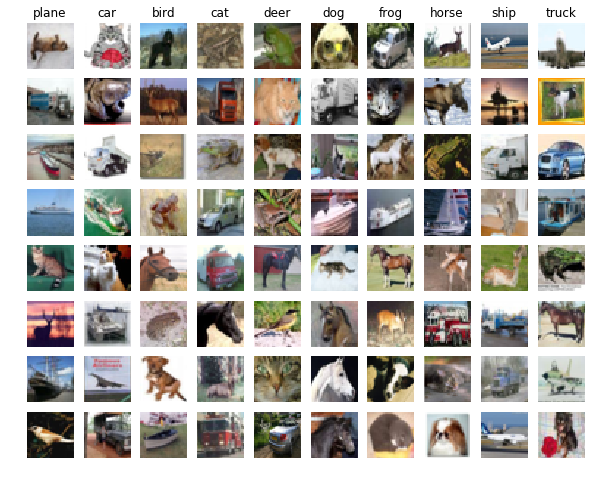

In [51]:
from cs231n.features import *
# =======================
# Only HOG featres
# =======================
num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
''''''
print('Begin training...')

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2, 5e-2, 1e-1, 5e-1]
regularization_strengths = [0]
# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [1e1, 1e2, 1e3]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
count = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        count += 1
#         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
        print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths))))
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, lr, reg, num_iters=1500)
        y_pred_train = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_pred_train)
        y_pred_val = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_pred_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,reg)] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
# '''
print('Begin testing')

# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

print('Observe misclassifications')

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()
# '''

Done extracting features for 10000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extracting features for 30000 / 49000 images
Done extracting features for 40000 / 49000 images
Begin training...
[COMPLETION PERCENTAGE] 16.000000 
[COMPLETION PERCENTAGE] 33.000000 
[COMPLETION PERCENTAGE] 50.000000 
[COMPLETION PERCENTAGE] 66.000000 
[COMPLETION PERCENTAGE] 83.000000 
[COMPLETION PERCENTAGE] 100.000000 
lr 1.000000e-04 reg 0.000000e+00 train accuracy: 0.216857 val accuracy: 0.261000
lr 5.000000e-04 reg 0.000000e+00 train accuracy: 0.222265 val accuracy: 0.268000
lr 1.000000e-03 reg 0.000000e+00 train accuracy: 0.225918 val accuracy: 0.283000
lr 5.000000e-03 reg 0.000000e+00 train accuracy: 0.226469 val accuracy: 0.285000
lr 1.000000e-02 reg 0.000000e+00 train accuracy: 0.229122 val accuracy: 0.287000
lr 5.000000e-02 reg 0.000000e+00 train accuracy: 0.228388 val accuracy: 0.280000
best validation accuracy achieved during cross-validation: 0.287000
Begin testing
0.2

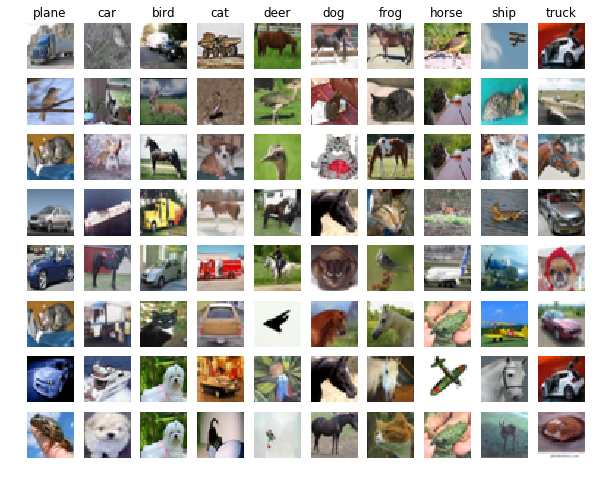

In [40]:
from cs231n.features import *
# =======================
# Only color hist featres
# =======================
num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])
# '''
print('Begin training...')

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-2, 5e-2, 1e-3, 5e-3, 1e-4, 5e-4]
regularization_strengths = [0]
# learning_rates = [1e-9, 1e-8, 1e-7]
# regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
count = 0
for lr in learning_rates:
    for reg in regularization_strengths:
        count += 1
#         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
        print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths))))
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, lr, reg, num_iters=1500)
        y_pred_train = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train == y_pred_train)
        y_pred_val = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val == y_pred_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm           
        results[(lr,reg)] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

print('Begin testing')

# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

print('Observe misclassifications')

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()
# '''

**Bonus 2**
Implemented dropout for the neural network. The accuracy curves for the neural net for training vs. validation seem to diverge after a few epochs. Adding dropout is an attempt to add regularization so that validation accuracy ~ training accuracy

Adding a lot of dropout actually lead to drop in the accuracy. For a low dropout, there was a marginal increase, as shown below. Moreover, for the best model, the gap between train and val accuracies is lower.

In [85]:
from cs231n.features import *
# =======================
# Neural net with dropout
# =======================
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
results = {}
best_val = -1
best_stats = None

learning_rates = [4e-1, 8e-1, 2e-1]
# learning_rates = [16e-2, 18e-2, 20e-2, 30e-2]
# learning_rates = [a*1e-4 for a in range(5,15,2)]
# learning_rates = [a*1e-6 for a in range(1,12,3)]
regularization_strengths = [0]
# regularization_strengths = [1e1, 1e2, 1e3, 5e1, 5e2, 5e3]
# regularization_strengths = [0, 0.3*1e1, 0.7*1e1, 1e1]
input_size = 32 * 32 * 3
hidden_sizes = [500]
num_classes = 10
dropout = 0.05

count = 0
for hs in hidden_sizes:
    for lr in learning_rates:
        for reg in regularization_strengths:
            count += 1
    #         print('[INFO] Running for %f combination: lr %f, reg %f' % (count, lr, reg))
            net = TwoLayerNet(input_dim, hs, num_classes)
            # Train the network
            stats = net.train_drop(X_train_feats, y_train, X_val_feats, y_val,
                num_iters=3500, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=False, keep=1-dropout)

            y_pred_train = net.predict(X_train_feats)
            train_accuracy = np.mean(y_train == y_pred_train)
            y_pred_val = net.predict(X_val_feats)
            val_accuracy = np.mean(y_val == y_pred_val)

            if val_accuracy > best_val:
                best_val = val_accuracy
                best_net = net
                best_stats = stats
            results[(lr,reg,hs)] = train_accuracy, val_accuracy
            
            print('[COMPLETION PERCENTAGE] %f ' % (100*count/(len(learning_rates)*len(regularization_strengths)*len(hidden_sizes))))
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg, hs in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg, hs)]
    print('lr %e reg %e hs %e \n train accuracy: %f val accuracy: %f' % (
                lr, reg, hs, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

################################################################################
#                              END OF YOUR CODE                                #
################################################################################

[COMPLETION PERCENTAGE] 33.000000 
[COMPLETION PERCENTAGE] 66.000000 
[COMPLETION PERCENTAGE] 100.000000 
lr 2.000000e-01 reg 0.000000e+00 hs 5.000000e+02 
 train accuracy: 0.662776 val accuracy: 0.577000
lr 4.000000e-01 reg 0.000000e+00 hs 5.000000e+02 
 train accuracy: 0.748041 val accuracy: 0.566000
lr 8.000000e-01 reg 0.000000e+00 hs 5.000000e+02 
 train accuracy: 0.797367 val accuracy: 0.544000
best validation accuracy achieved during cross-validation: 0.577000


In [86]:
# Run your neural net classifier on the test set.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.577
